## 4. New Variables & Aggregation

### This script contains the following:
1. Importing libraries and data
2. Creating new variables (columns)
3. Data aggregation
4. Exporting dataframe containing new variables

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path = r'C:\Users\Neena Tilton\Dropbox\Projects\MinWage_Crime'

In [3]:
# Import merged dataframe from last script 

df = pd.read_pickle(os.path.join(path, '02_Data', 'PreparedData', 'df_merged.pkl'))

In [4]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0


In [5]:
df.shape

(800, 14)

### 2. Creating new variables

Create a new column named 'incarceration_rate' containing the value of 'prisoner_count' in proportion to 'state_population'. 

In [9]:
df['incarceration_rate'] = (df['prisoner_count']/df['state_population'])

In [12]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary,incarceration_rate
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0,0.005536
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0,0.007212
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0,0.005221
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0,0.004264
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0,0.004542


Create a new column named 'rate_rank' categorizing low, mid, and high incarceration rates. 

In [13]:
# To determine how to categorize the rate numberically, first create a histogram.

# Import needed libraries for visualization, may need it later. 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<AxesSubplot:ylabel='Frequency'>

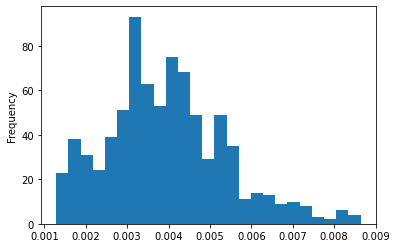

In [14]:
df['incarceration_rate'].plot.hist(bins = 25)

Gathering info from the histogram, 'incarceration_rate' will be categorized as 'low' if less than 0.003, 'medium' if between 0.003 and 0.005, 'high' if between 0.005 to 0.007, and 'ununsually high' if higher than 0.007. 

In [15]:
df.loc[df['incarceration_rate'] <= 0.003, 'rate_rank'] = 'Low'

In [16]:
df.loc[(df['incarceration_rate'] > 0.003) & (df['incarceration_rate'] <= 0.005), 'rate_rank'] = 'Medium'

In [17]:
df.loc[(df['incarceration_rate'] > 0.005) & (df['incarceration_rate'] <= 0.007), 'rate_rank'] = 'High'

In [18]:
df.loc[df['incarceration_rate'] > 0.007, 'rate_rank'] = 'Unusually High'

In [19]:
df['rate_rank'].value_counts(dropna=False)

Medium            428
Low               198
High              148
Unusually High     26
Name: rate_rank, dtype: int64

In [20]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary,incarceration_rate,rate_rank
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0,0.005536,High
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0,0.007212,Unusually High
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0,0.005221,High
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0,0.004264,Medium
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0,0.004542,Medium


### 3. Data aggregation

In [21]:
df.groupby('Year').agg({'incarceration_rate': ['mean']})

,incarceration_rate
,mean
Year,
2001,0.003832
2002,0.003896
2003,0.003938
2004,0.003959
2005,0.004013
2006,0.004093
2007,0.004122
2008,0.004091


In [24]:
# Add the above aggreation onto main df using transform(). 

df['avg_rate_of_year'] = df.groupby(['Year'])['incarceration_rate'].transform(np.mean)

In [25]:
df.head()

,Year,State,state_mw,state_mw_2020,fed_mw,fed_mw_2020,effective_mw,effective_mw_2020,prisoner_count,state_population,violent_crime,murder,robbery,burglary,incarceration_rate,rate_rank,avg_rate_of_year
0,2001,Alabama,0.00,0.00,5.15,7.52,5.15,7.52,24741.0,4468912.0,19582.0,379.0,5584.0,40642.0,0.005536,High,0.003832
1,2001,Alaska,5.65,8.25,5.15,7.52,5.65,8.25,4570.0,633630.0,3735.0,39.0,514.0,3847.0,0.007212,Unusually High,0.003832
2,2001,Arizona,0.00,0.00,5.15,7.52,5.15,7.52,27710.0,5306966.0,28675.0,400.0,8868.0,54821.0,0.005221,High,0.003832
3,2001,Arkansas,5.15,7.52,5.15,7.52,5.15,7.52,11489.0,2694698.0,12190.0,148.0,2181.0,22196.0,0.004264,Medium,0.003832
4,2001,California,6.25,9.13,5.15,7.52,6.25,9.13,157142.0,34600464.0,212867.0,2206.0,64614.0,232273.0,0.004542,Medium,0.003832


### 4. Exporting dataframe containing new variables

In [26]:
df.to_pickle(os.path.join(path, '02_Data','PreparedData', 'df_newvar.pkl'))